In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("Iris.csv")
titan = pd.read_csv("Titanic Dataset.csv")
titan

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...
190,191,1,2,"Pinsky, Mrs. (Rosa)",32.0,0,0,234604,13.0000,NaN,S,female
191,192,0,2,"Carbines, Mr. William",19.0,0,0,28424,13.0000,NaN,S,male
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",19.0,1,0,350046,7.8542,NaN,S,female
193,194,1,2,"Navratil, Master. Michel M",3.0,1,1,230080,26.0000,F2,S,male


In [5]:
#Median of Categorical data
categories = ['setosa','versicolor', 'virginica']
data['flower_num'] = pd.Categorical(data['Species'], categories, ordered = True)
median_value = np.median(data['flower_num'].cat.codes)
median_text = categories[int(median_value)]
print("Median of Species:", median_text)

Median of Species: virginica


<Axes: >

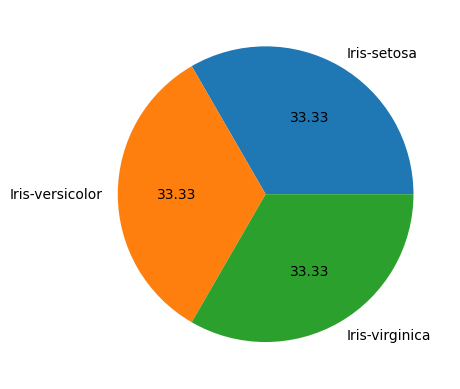

In [6]:
#Pie chart
data.groupby(data['Species']).size().plot(kind = 'pie', autopct = '%.2f')

In [7]:
nominal_cat = ['Name', 'Ticket', 'Cabin']
ordinal_cat = ['Embarked', 'Gender']
#Median of gender
genders = ['Male', 'Female']
titan['Gender'] = pd.Categorical(titan['Gender'], genders, ordered = True)
gender_index = np.median(titan['Gender'].cat.codes)
median_gender = genders[int(gender_index)]
print("Median of Gender:", median_gender)

Median of Gender: Female


In [ ]:
#Median of embarked
embarker = ['S', 'C', 'Q']
titan['Embarked'] = pd.Categorical(titan['Embarked'], embarker, ordered = True)
embark_index = np.median(titan['Embarked'].cat.codes)
median_embark = embarker[int(embark_index)]
print("Median of Embarked:", median_embark)

Median of Embarked: S


<Axes: xlabel='Gender', ylabel='count'>

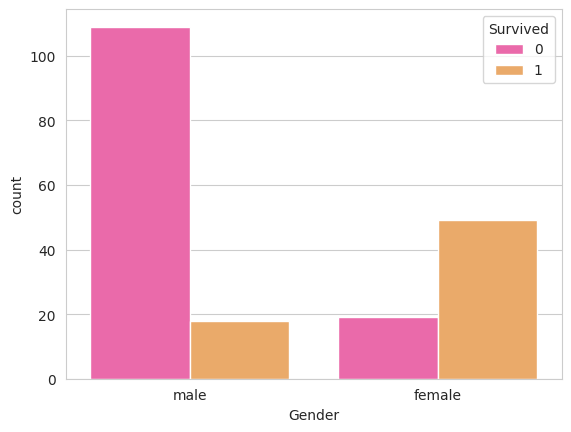

In [ ]:
#Countplot
sns.set_style('whitegrid')
#Countplot of survivors on gender basis
sns.countplot(data = titan, x = 'Gender', hue = 'Survived', palette = 'spring')

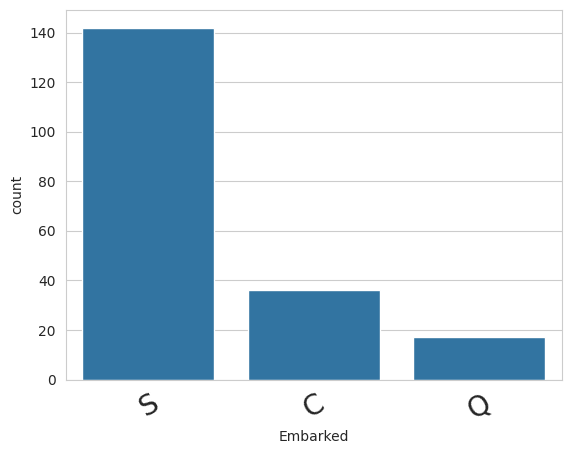

In [ ]:
sns.countplot(x = 'Embarked', data = titan)
plt.xticks(rotation = 30, fontsize = 20)
plt.show()

<ipython-input-37-1428533152>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = titan, palette = 'YlOrRd')


<Axes: xlabel='Survived', ylabel='count'>

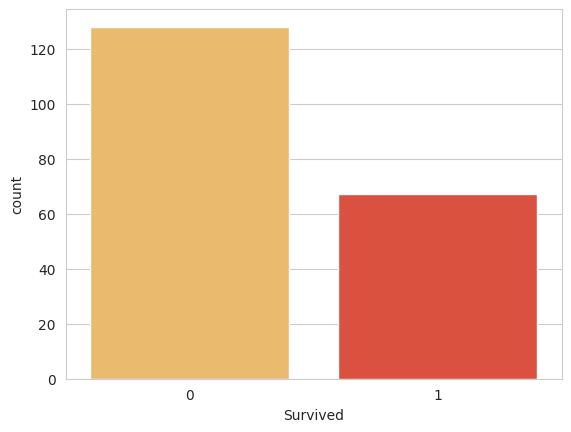

In [ ]:
sns.countplot(x = 'Survived', data = titan, palette = 'YlOrRd')

Distribution of labels: PassengerId


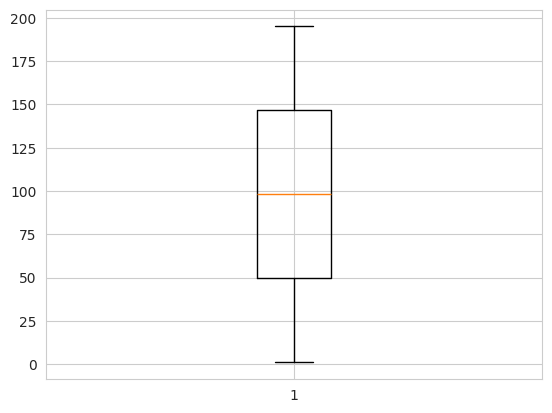

Distribution of labels: Survived


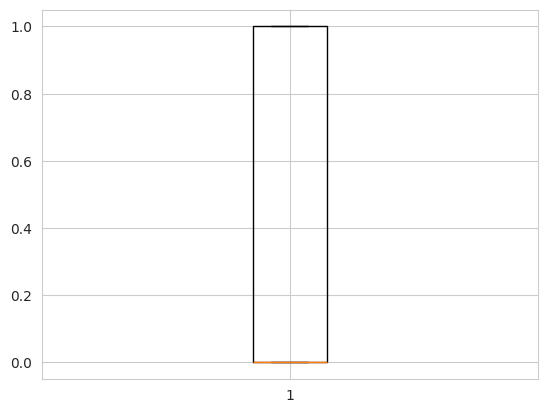

Distribution of labels: Pclass


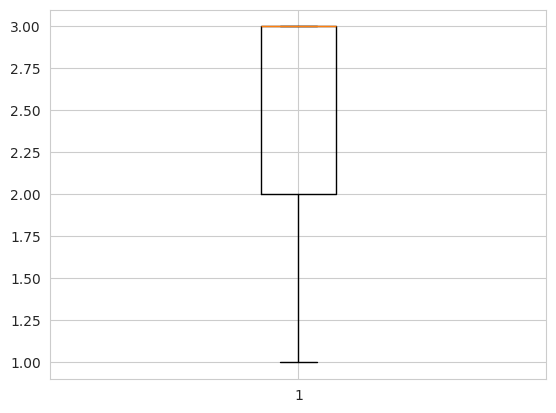

Distribution of labels: Age


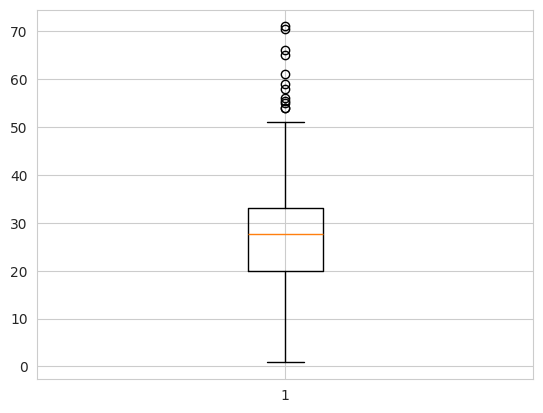

Distribution of labels: SibSp


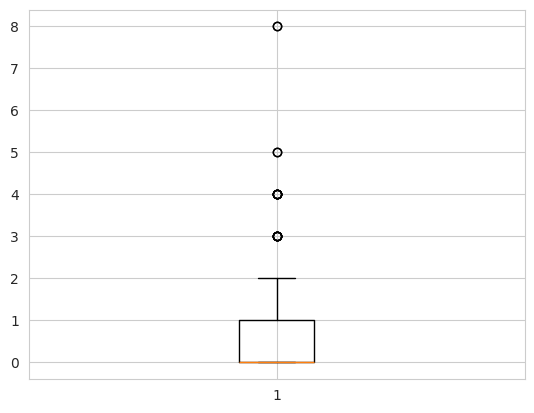

Distribution of labels: Parch


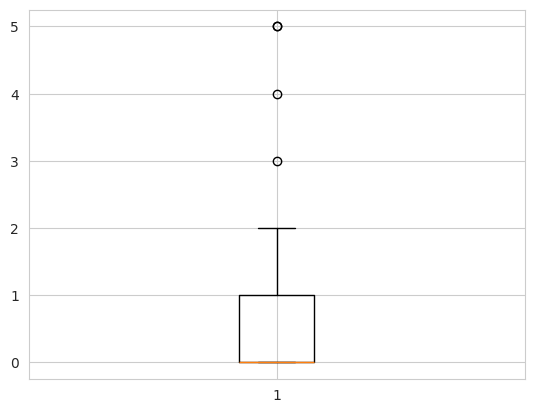

Distribution of labels: Fare


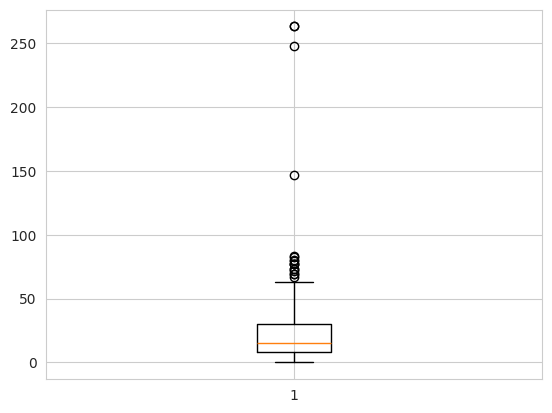

In [ ]:
num_data = titan.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Gender'], axis = 1)
labels = ['PassengerId', 'Survived', 'Pclass', 'Age' , 'SibSp', 'Parch', 'Fare']
for label in labels:
  plt.boxplot(num_data[label])
  print("Distribution of labels:", label)
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_data = scaler.fit_transform(num_data)
num_data

array([[-1.72319115, -0.72348981,  0.7281085 , ...,  0.23148115,
        -0.5027263 , -0.55671163],
       [-1.7054263 ,  1.38218948, -1.78483235, ...,  0.23148115,
        -0.5027263 ,  1.2226776 ],
       [-1.68766144,  1.38218948,  0.7281085 , ..., -0.53358367,
        -0.5027263 , -0.5379544 ],
       ...,
       [ 1.68766144,  1.38218948,  0.7281085 , ...,  0.23148115,
        -0.5027263 , -0.53992182],
       [ 1.7054263 ,  1.38218948, -0.52836192, ...,  0.23148115,
         0.63717636, -0.0356773 ],
       [ 1.72319115,  1.38218948, -1.78483235, ..., -0.53358367,
        -0.5027263 ,  0.01214115]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
num_data = scale.fit_transform(num_data)
num_data

array([[0.        , 0.        , 1.        , ..., 0.125     , 0.        ,
        0.02756654],
       [0.00515464, 1.        , 0.        , ..., 0.125     , 0.        ,
        0.27103916],
       [0.01030928, 1.        , 1.        , ..., 0.        , 0.        ,
        0.03013308],
       ...,
       [0.98969072, 1.        , 1.        , ..., 0.125     , 0.        ,
        0.02986388],
       [0.99484536, 1.        , 0.5       , ..., 0.125     , 0.2       ,
        0.09885932],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.10540228]])